# Genetic Algorithm Exercise

In [1]:
import random
from mpl_toolkits import mplot3d
from matplotlib import pyplot as plt
import numpy as np
import math
import copy

%matplotlib inline

Minimise the the following functions:

In [22]:
def f1(x):
    return np.power(x, 2)
def f2(x, y):
    return 20 + f2_(x) + f2_(y)
def f2_(x):
    return x**2 - 10*np.cos(2*3.14*x)

<function matplotlib.pyplot.show(close=None, block=None)>

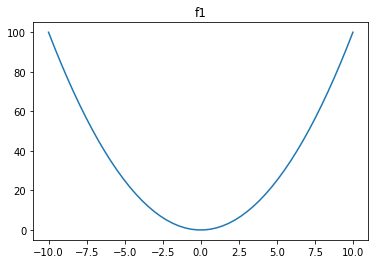

In [3]:
x = np.linspace(-10, 10)
plt.plot(x, f1(x))
plt.title("f1")
plt.show

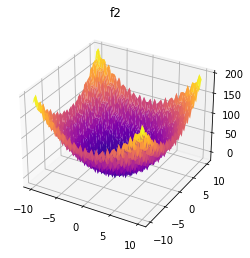

In [4]:
space = np.linspace(-10, 10)
x, y = np.meshgrid(space, space)
z = f2_(x) + f2_(y)

fig = plt.figure()
 
# syntax for 3-D plotting
ax = plt.axes(projection ='3d')
 
# syntax for plotting
ax.plot_surface(x, y, z, cmap='plasma')
ax.set_title('f2')
plt.show()

In [10]:
## Initialize population
n = 10
N = [random.uniform(-10, 10) for _ in range(n)]
N

[-7.767641418086127,
 9.260336301830343,
 -7.79697820639525,
 -8.929979936032222,
 2.077695392459095,
 -8.432408643370373,
 0.2209691305677648,
 1.4924164415120593,
 -1.0215539287273465,
 5.760826715676657]

In [11]:
## generate children and add to population
birthrate = 10
variance = .1

def spawn_nextgen(N):
    N2 = copy.deepcopy(N)
    for n in N:
        N2 += [n+random.gauss(0,variance) for x in range(birthrate)]
    return N2

In [12]:
def show_f1_fitness(x):
    plt.scatter(x, f1(x))
    plt.show()

In [13]:
def select(N):
    ordered = sorted(N, key=f1)
    return ordered[:10]

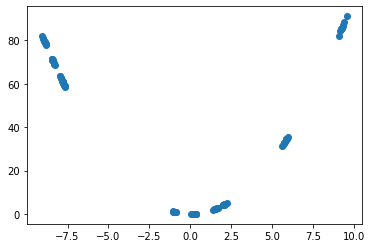

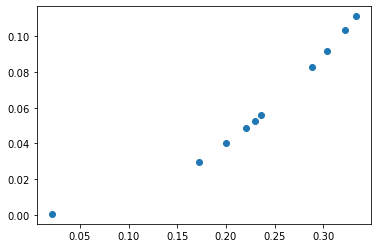

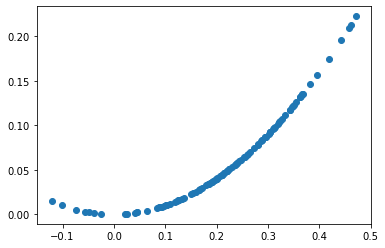

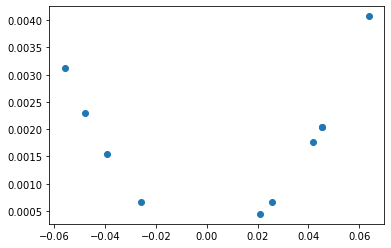

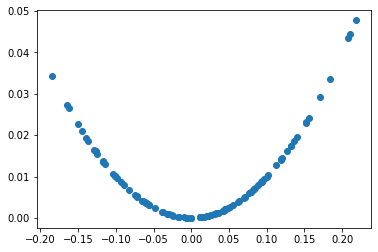

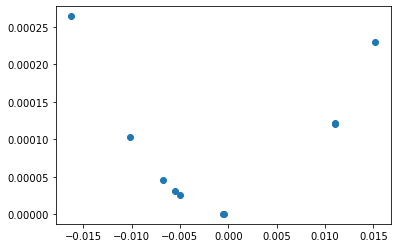

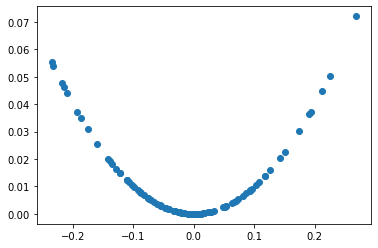

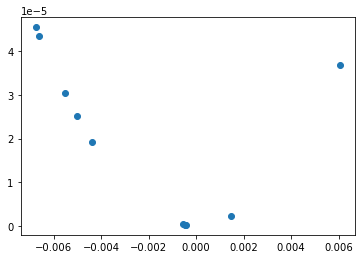

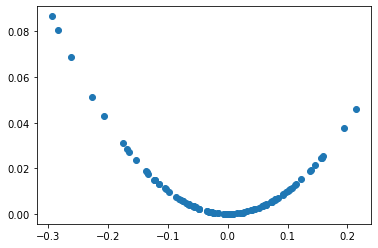

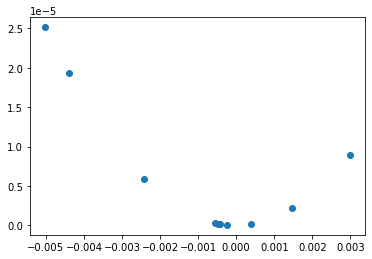

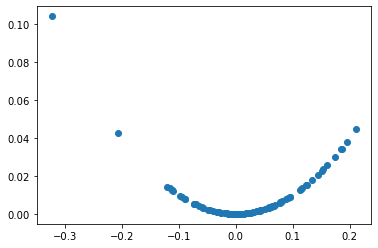

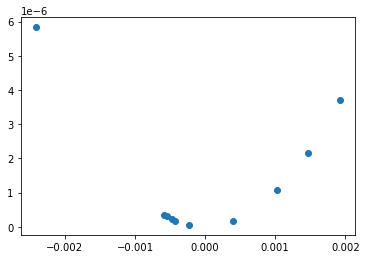

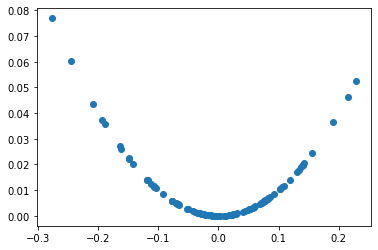

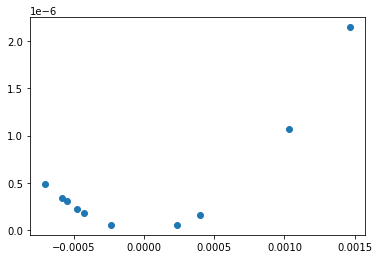

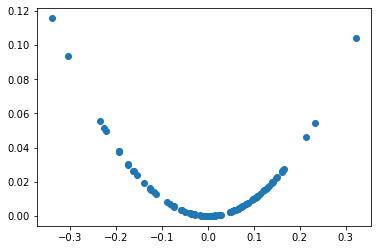

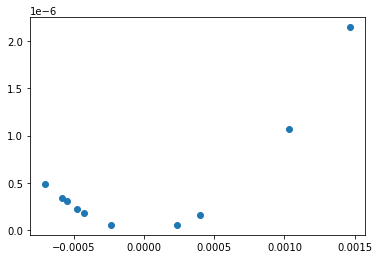

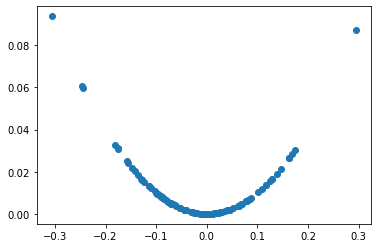

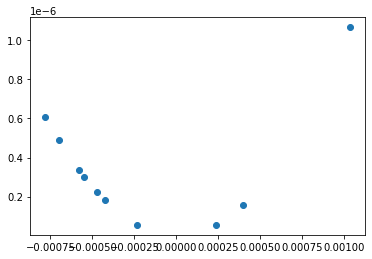

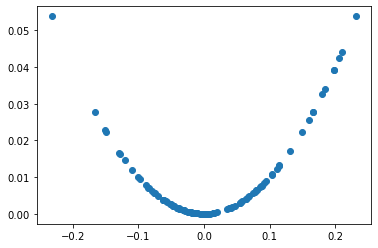

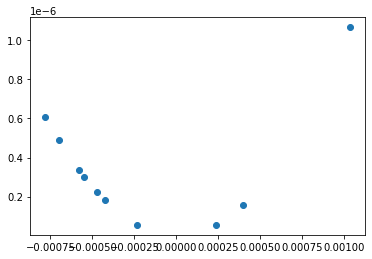

In [14]:
for i in range(10):
    nextgen = spawn_nextgen(N)
    show_f1_fitness(nextgen)
    N = select(nextgen)
    show_f1_fitness(N)
    

In [76]:
N

[-4.441339730154905,
 -8.904012927275065,
 6.709272102644665,
 -8.409699207167282,
 6.530906520567818,
 4.42974969386076,
 -1.8401978408779236,
 -1.369221702680722,
 -1.3753392850161088,
 8.631445657356377]

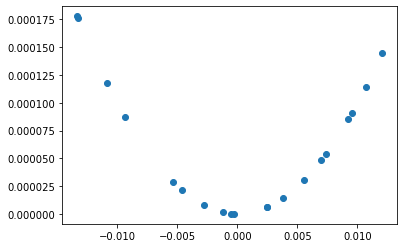

In [97]:
show_f1_fitness(N)

[-0.0002559547509846105,
 -0.0005638079680538866,
 -0.0011707659990673643,
 0.0024376321288443054,
 0.002496326579367332,
 -0.002801944330507799,
 0.003821807170125948,
 -0.004649748628565778,
 -0.0053464647116748185,
 0.005529201017804937,
 0.0069793696936075395,
 0.007354864407142274,
 0.009254692223807287,
 -0.009340289985569822,
 0.009550937860801335,
 0.010699019513962287,
 -0.010840267464948206,
 0.012026937114678782,
 -0.01327883010304403,
 -0.013337470379084802]

In [95]:
max(N, key = f1)

0.012026937114678782

In [23]:
class blip:
    def __init__(self, _x, _y):
        self.x = _x
        self.y = _y
#         self.z = _z
        self.sigma = 2
    def z(self):
        return f2(self.x, self.y)

In [24]:
## Initialize population
n = 50
# random.uniform(-10, 10)
# for _ in range(n):
    

N = [blip(random.uniform(-10, 10), random.uniform(-10, 10)) for _ in range(n)]
N

In [25]:
## generate children and add to population
birthrate = 20
variance = .1

def spawn_nextgen_f2(N):
    N2 = copy.deepcopy(N)
    for n in N:
        for _ in range(birthrate):
            baby = copy.deepcopy(n)
            baby.sigma+= random.gauss(0,variance)
            baby.x += random.gauss(0,baby.sigma)
            baby.y += random.gauss(0,baby.sigma)
            N2 += [baby]
    return N2

In [26]:
def show_f2_fitness(N):
    x = [b.x for b in N]
    y = [b.x for b in N]
    z = [b.z() for b in N]
#     z = [b.x for b in N]
    fig = plt.figure()
    # syntax for 3-D plotting
    ax = plt.axes(projection ='3d')
    # syntax for plotting
    ax.scatter(x, y, z, cmap='plasma')
    ax.set_title('f2')
    plt.show()

In [29]:
def f2_blip(blip):
    return blip.z()
def select_f2(N):
    ordered = sorted(N, key=f2_blip)
    return ordered[:n]

In [35]:
for i in range(500):
    nextgen = spawn_nextgen_f2(N)
    N = select_f2(nextgen)
#     show_f2_fitness(N)

In [36]:
(np.array([b.sigma for b in N]) > 2).sum() / len(N)

0.18

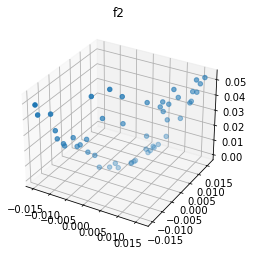

In [37]:
show_f2_fitness(N)

In [38]:
[b.sigma for b in N]

[0.8293104500986713,
 1.3152432487818126,
 1.3608201853447934,
 1.6671190394589581,
 1.727564316194641,
 2.0998184846598558,
 1.7829637500269775,
 2.033141547705763,
 1.6869976245155793,
 2.024510106527763,
 1.6848910679509321,
 1.990135116409751,
 1.9224367076592128,
 2.1743762898455894,
 1.5819727631194445,
 1.321525708247895,
 1.6857818885612108,
 1.308458703363152,
 2.065716588567701,
 2.084008337156999,
 1.0392983115104812,
 1.0321469350342922,
 1.761660609757978,
 1.7683116387924178,
 1.8471120663776874,
 0.6897172869274543,
 1.372678506746948,
 1.8836504384388173,
 1.0768147446977354,
 1.6888490904583766,
 1.394783924654625,
 1.7406337619359264,
 1.6861543858311006,
 1.4406518446138146,
 1.2404991777890435,
 1.3558273168456738,
 1.972059809807633,
 1.8443811430615684,
 1.0745857267556047,
 1.3818427608070016,
 1.6376895213839384,
 2.087507724655886,
 1.7551979499082777,
 2.1082343106280397,
 1.5630574196934046,
 1.1778446148029307,
 1.6307259443833961,
 2.209777156724258,
 1.528

In [39]:
a = [1,2,3]
b = [

[[1, 2, 3], [4, 5]]